# Fourrier analysis and sine wave superposition
Fourrier analysis is the decompsition of a signal into sine waves. To understand how this can be done it is first useful to illustarte that multiple sine waves added together can create a wave of another shape.

Acknowlegdement: the functions here are mostly taken from Caleb Madrigal's  "Sound Analysis with the Fourier Transform and Python" OSCON Talk [on github](https://github.com/calebmadrigal/FourierTalkOSCON) (slide 2).

The next cell sets up some functions to help plotting.

In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

First, y1..y4 are some sine waves of different frequnecies; y2 has twice the frequency of y1, y3 & y4 have 3 & 4 times the frequency of y1.

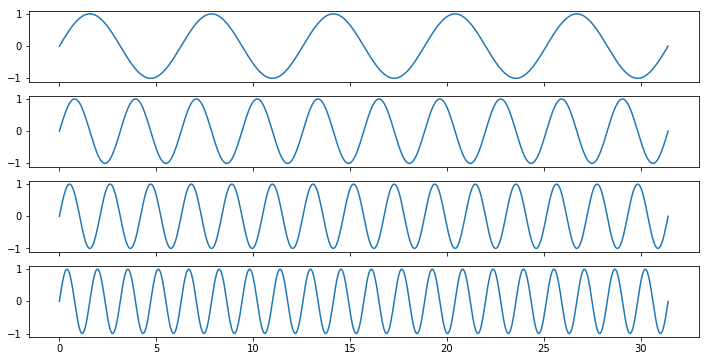

In [9]:
# Two subplots, the axes array is 1-d
x = np.linspace(0, 10 * np.pi, 500)
y1 = np.sin(x)
y2 = np.sin(2*x)
y3 = np.sin(3*x)
y4 = np.sin(4*x)

f, axarr = plt.subplots(4, sharex=True, sharey=True)
f.set_size_inches(12,6)
axarr[0].plot(x, y1)
axarr[1].plot(x, y2)
axarr[2].plot(x, y3)
axarr[3].plot(x, y4)
_ = plt.show()

If we just add those together

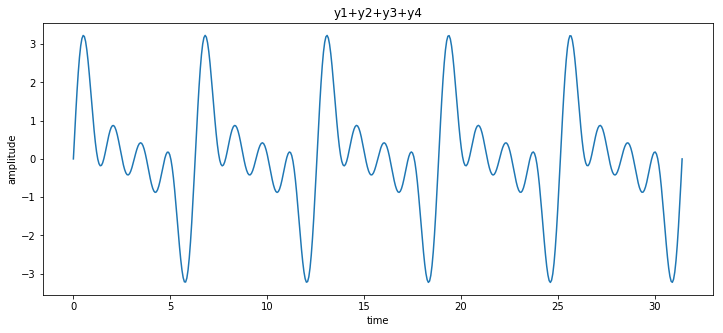

In [4]:
setup_graph(x_label='time', y_label='amplitude', title='y1+y2+y3+y4', 
            fig_size=(12,5))
wave_sum = y1 + y2 + y3 + y4
_ = plt.plot(x, wave_sum)

Which is .... interesting.

But what happens if we vary the amplitudes of y1..y4?

Let's set a1--a4 as the amplitudes of y1--y4 respectively.

In [40]:
a1 = 1
a2 = 1/2
a3 = 1/4
a4 = 1/8

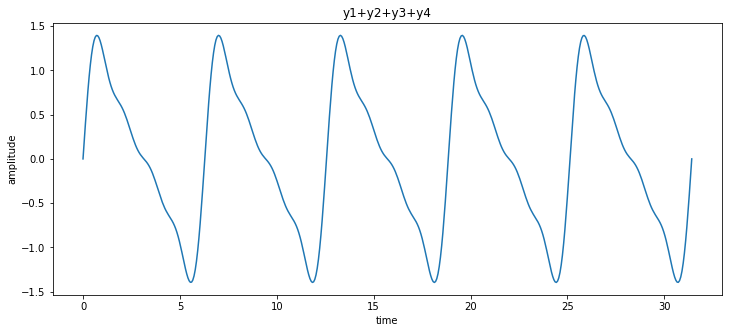

In [41]:
setup_graph(x_label='time', y_label='amplitude', title='y1+y2+y3+y4', 
            fig_size=(12,5))
wave_sum = a1 * y1 + a2 * y2 + a3 * y3 + a4 * y4
_ = plt.plot(x, wave_sum)

That's beginning to look like a saw-tooth wave form.

Here's what happens when you add more waves with the same pattern of ever-decreasing amplitudes:

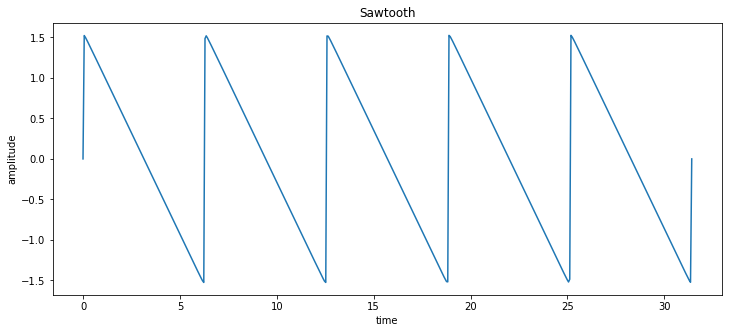

In [27]:
wave_sum2 = 0
for n in range(1, 1000):
    wave = (1/n) * np.sin(n * x)
    wave_sum2 = wave_sum2 + wave
setup_graph(x_label='time', y_label='amplitude', title='Sawtooth', 
            fig_size=(12,5))
_ = plt.plot(x, wave_sum2)

Different patterns of amplitude and frequency give different wave forms. For the saw tooth we added all harmonics, if you only add the even harmonics you get a square wave.

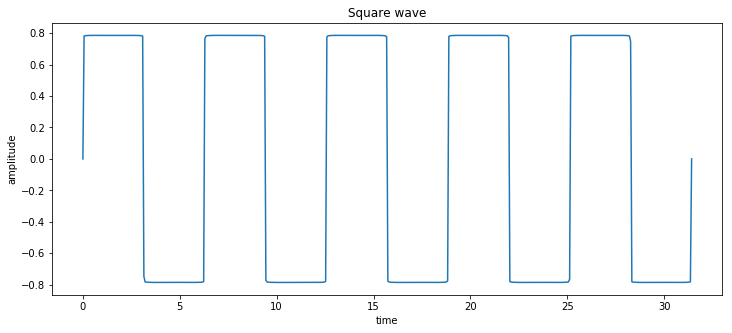

In [52]:
wave_sum2 = 0
for n in range(0, 1000):
    m = 2*n+1     #this gives us 1, 3, 5,...
    wave = 1/m * np.sin(m * x)
    wave_sum2 = wave_sum2 + wave
setup_graph(x_label='time', y_label='amplitude', title='Square wave', 
            fig_size=(12,5))
_ = plt.plot(x, wave_sum2)